In [130]:
import numpy as np
from sklearn.datasets import load_boston
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [131]:
data=load_boston()
X=data.data[0:,[2,6]]
Y=data.target

In [132]:
class Adaline:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        # m=(X.T*X)^-1*X.T*Y
        self.m=np.matmul(inv(np.matmul(x_train.T, x_train)), np.matmul(x_train.T, y_train))
        return self.m
    
    def predict(self, x_test):
        y_predict = np.matmul(x_test, self.m)
        return y_predict
    
    def evaluate_MAE(self,X_test,Y_test):
        Y_pred=np.matmul(X_test, self.m)
        subtract=np.abs(Y_test-Y_pred)
        avg=np.mean(subtract)
        return avg
    
    def evaluate_MSE(self,X_test,Y_test):
        Y_pred=np.matmul(X_test, self.m)
        subtract=np.square(Y_test-Y_pred)
        avg=np.mean(subtract)
        return avg

In [133]:
Y.reshape(506,1)
model=Adaline()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)
model.fit(X_train,Y_train)
y_pr=model.predict(X_test)


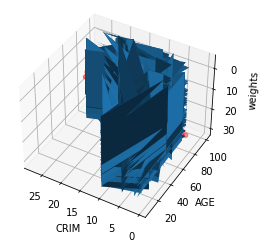

In [134]:
y_pr.reshape(127,1)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_test[:,0],X_test[:,1],y_pr , c='red')
Y=y_pr.reshape(127,1)
ax.plot_surface(X_test[:,0], X_test[:,1], Y )
ax.set_xlabel('CRIM')
ax.set_ylabel('AGE')
ax.set_zlabel('weights')
ax.view_init(-140, 60)
plt.show()


(127, 2)
(127, 3)


(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

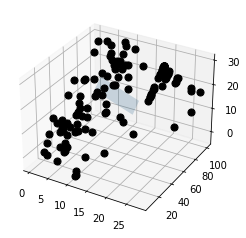

In [135]:
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

X=np.array(X,dtype='int')
Y=np.array(Y,dtype='int')
p=np.concatenate((X_test,Y),axis=1)
print(X_test.shape)
print(p.shape)
points = Points(p)
plane = Plane.best_fit(points)
plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

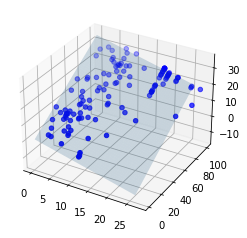

In [136]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#xy points
x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())
#make 2D x,y array
x, y = np.meshgrid(x_range, y_range)
#z=X*a1+Y*a2
#formulla :/
m = model.m
z = x * m[0] + y * m[1]

ax.plot_surface(x, y, z, alpha = 0.2)
ax.scatter(X_test[:,0],X_test[:,1],y_pr , c='blue')


plt.show()


In [137]:
MAE=model.evaluate_MAE(X_test,Y_test)
MSE=model.evaluate_MSE(X_test,Y_test)
print('MAE:',MAE)
print('MSE:',MSE)

MAE: 12.641669182277115
MSE: 258.3781225142801
